In [2]:
require(data.table)
require(ggplot2)
require(tidyr)
require(RColorBrewer)
options(repr.plot.width=20, repr.plot.height=15)

Loading required package: data.table

Loading required package: ggplot2

Loading required package: tidyr

Loading required package: RColorBrewer



In [3]:
coral=read.csv("~/Documents/Lenfest/Plot_CSV_v2/Fig_Data_Habitat_Coverage_Corals.csv")
Mansea=read.csv("~/Documents/Lenfest/Plot_CSV_v2/Fig_Data_Habitat_Coverage_Mangrove_Seagrass.csv")


#coverage=read.csv("~/Documents/Lenfest/Plot_CSV_v2/")
OBIS=read.csv("~/Documents/Lenfest/Plot_CSV_v2/Fig_Data_OBIS_Species.csv")
region=read.csv("~/Documents/Lenfest/Plot_CSV_v2/Regions.csv")


In [4]:
coralr=merge(coral, region, by=c("NAME", "Ecoregion_ID"))

In [5]:
mansear=merge(Mansea, region, by=c("NAME", "Ecoregion_ID"))

In [22]:
mansear

NAME,Ecoregion_ID,ER.Covered.by.Seagrass,PCT.of.ER.Covered.by.Mangrove,Region,Habitat,PA,percent
<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
Acadian Atlantic,1,0.120,NA,East Coast,Seagrass,MPA,23.53834241
Acadian Atlantic,1,0.120,NA,East Coast,Seagrass,FPA,0.25257961
Acadian Atlantic,1,0.120,NA,East Coast,Mangrove,MPA,NA
Acadian Atlantic,1,0.120,NA,East Coast,Mangrove,FPA,NA
Alaskan/Fjordland Pacific,2,0.008,NA,Alaska,Seagrass,MPA,NA
Alaskan/Fjordland Pacific,2,0.008,NA,Alaska,Seagrass,FPA,NA
Alaskan/Fjordland Pacific,2,0.008,NA,Alaska,Mangrove,MPA,NA
Alaskan/Fjordland Pacific,2,0.008,NA,Alaska,Mangrove,FPA,NA
Aleutian Archipelago,3,NA,NA,Alaska,Seagrass,MPA,NA


## Mangrove bar plot

In [6]:
mansear=pivot_longer(mansear,
  cols=c('Seagrass_MPA','Seagrass_FPA', 'Mangrove_MPA','Mangrove_FPA'),
  names_to = c("Habitat","PA"),
    names_sep = "_",
  values_to = "percent"
         )

In [7]:
mansear$ER.Covered.by.Seagrass=signif(mansear$ER.Covered.by.Seagrass, digits=2)
mansear$PCT.of.ER.Covered.by.Mangrove=signif(mansear$PCT.of.ER.Covered.by.Mangrove, digits=2)

In [8]:
head(mansear)

NAME,Ecoregion_ID,ER.Covered.by.Seagrass,PCT.of.ER.Covered.by.Mangrove,Region,Habitat,PA,percent
<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
Acadian Atlantic,1,0.120,NA,East Coast,Seagrass,MPA,23.5383424
Acadian Atlantic,1,0.120,NA,East Coast,Seagrass,FPA,0.2525796
Acadian Atlantic,1,0.120,NA,East Coast,Mangrove,MPA,NA
Acadian Atlantic,1,0.120,NA,East Coast,Mangrove,FPA,NA
Alaskan/Fjordland Pacific,2,0.008,NA,Alaska,Seagrass,MPA,NA
Alaskan/Fjordland Pacific,2,0.008,NA,Alaska,Seagrass,FPA,NA


Warning message:
“Removed 36 rows containing missing values (geom_text).”
Warning message:
“Removed 37 rows containing missing values (geom_bar).”


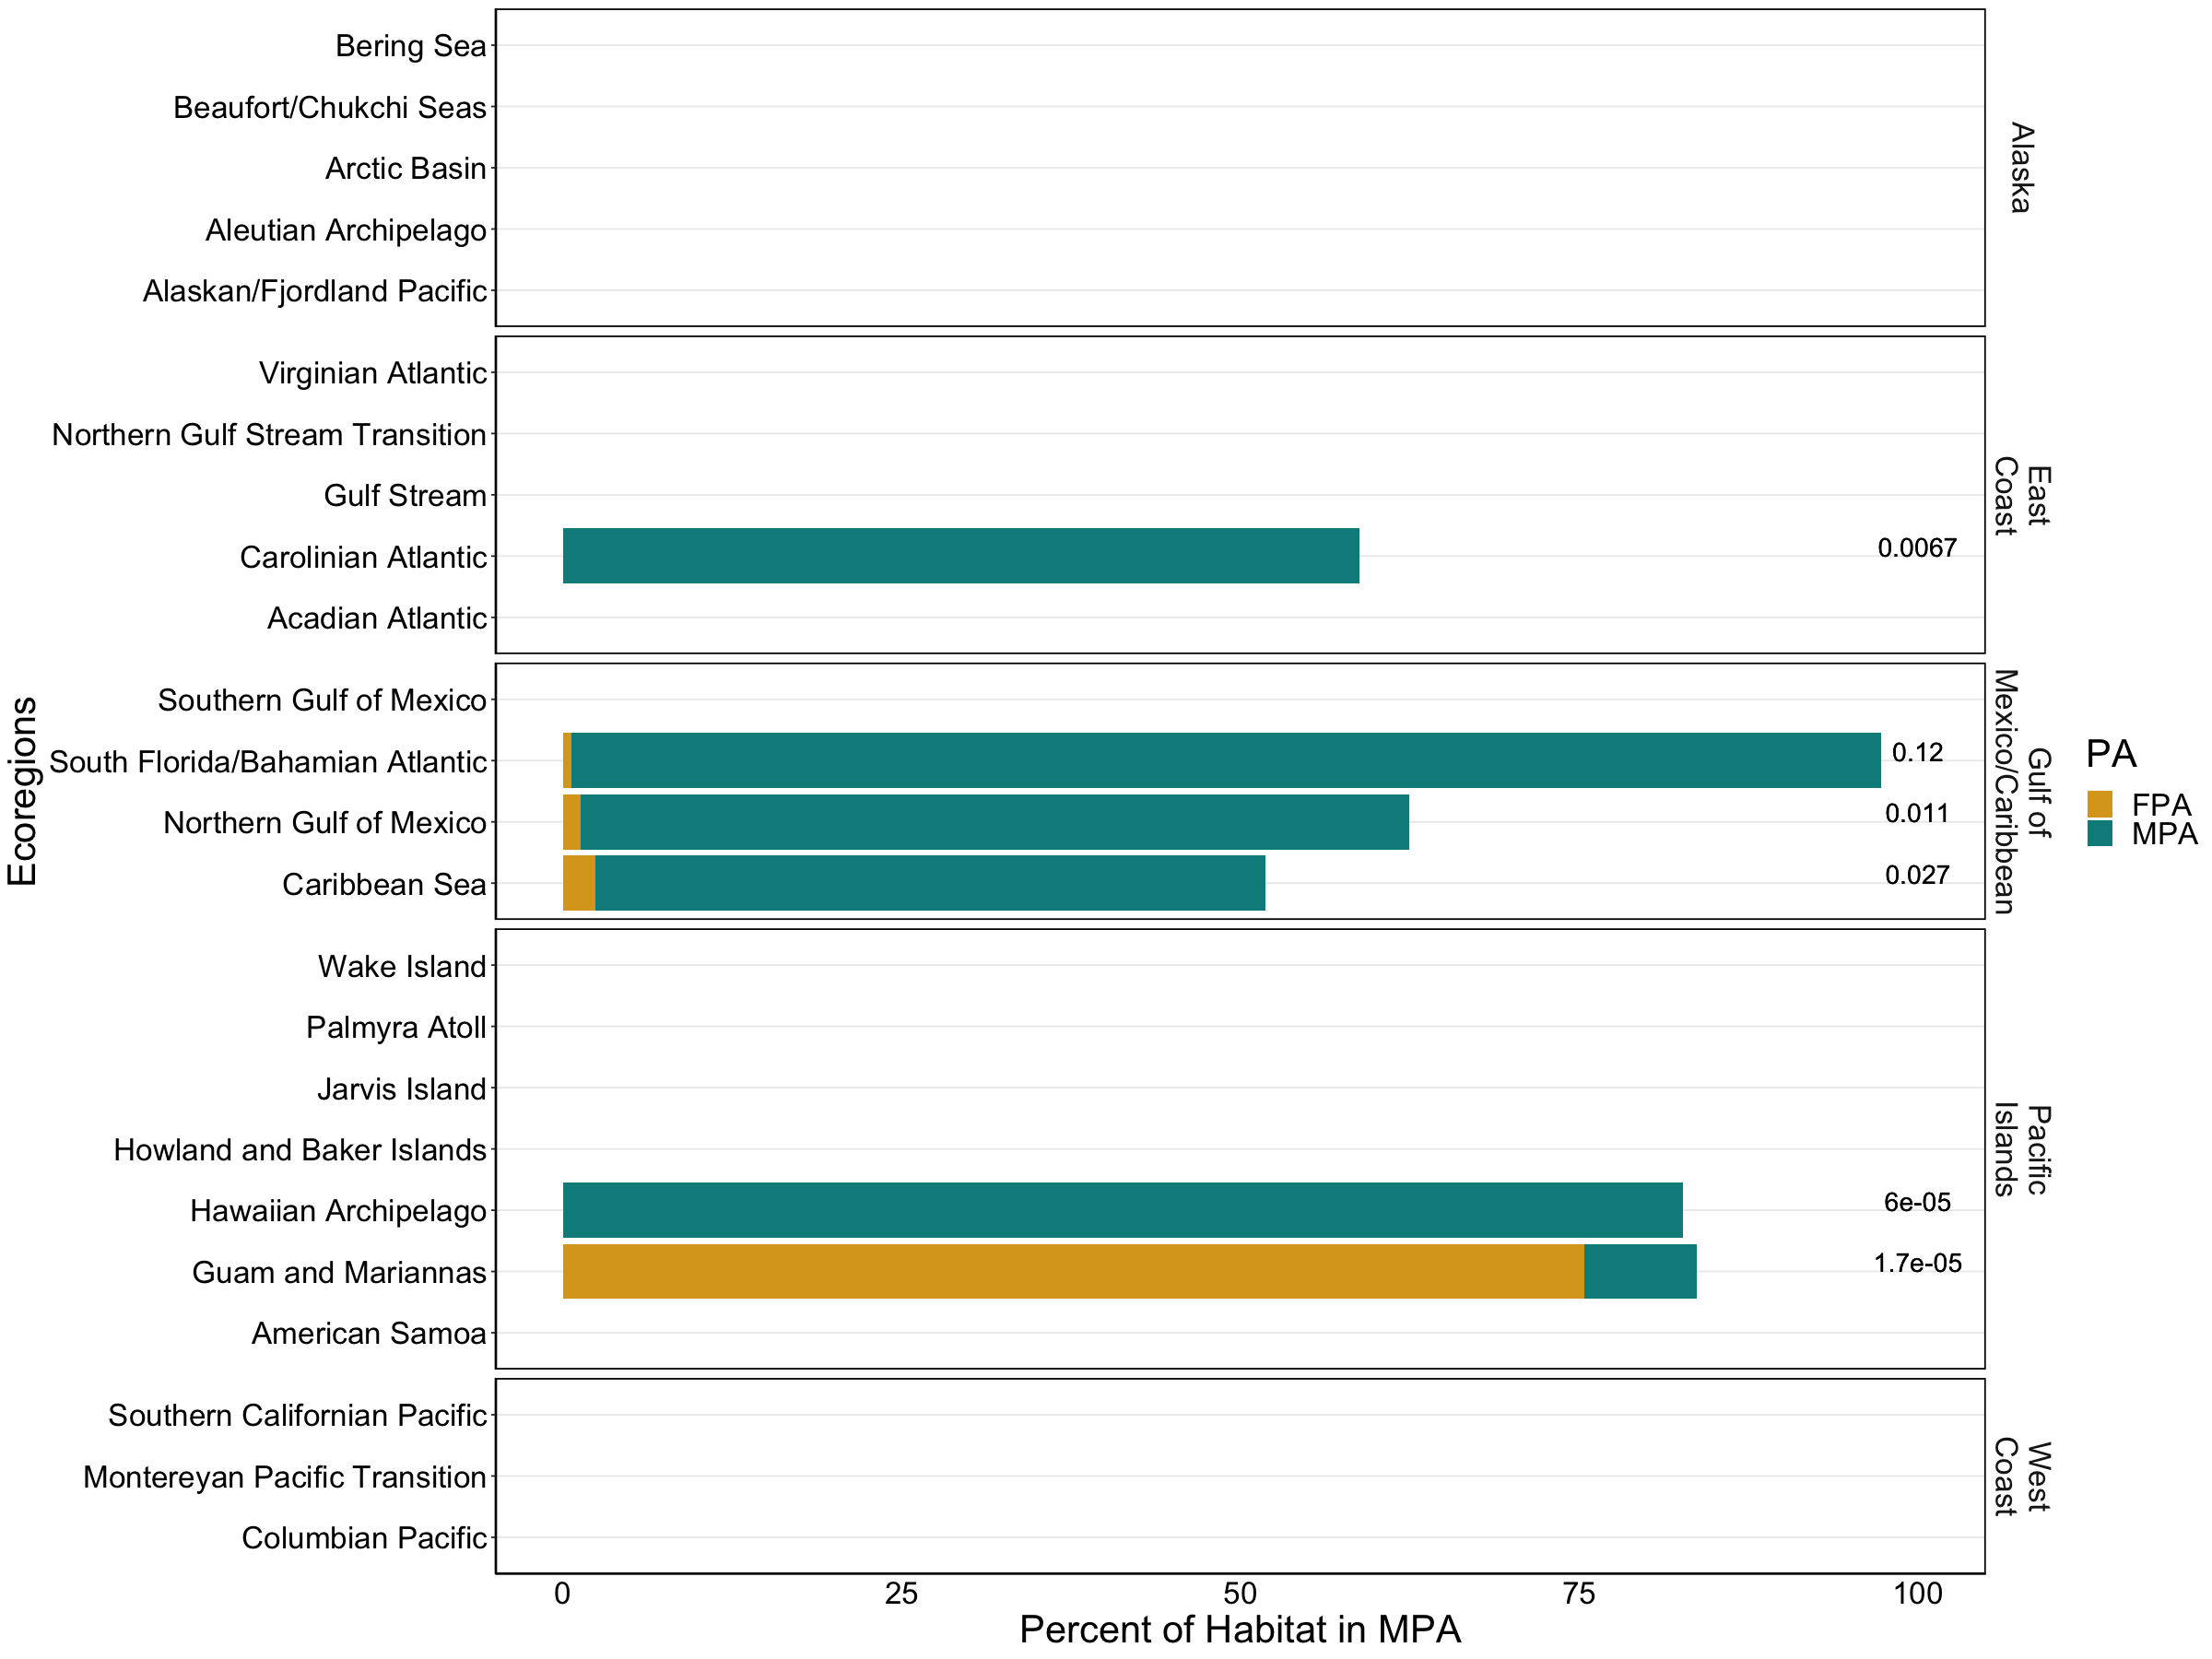

In [9]:
ggplot(mansear[mansear$Habitat=="Mangrove",], aes(y=NAME, x=percent)) +
geom_text(x=100, aes( label=PCT.of.ER.Covered.by.Mangrove),  vjust = 0,  size=6)+
geom_bar(position="identity", stat="identity", aes(fill=PA ))+
scale_fill_manual(values=c("goldenrod", "cyan4"))+
facet_grid(Region~., scales="free", space="free",    labeller = labeller(Region = label_wrap_gen(10)))+
theme_bw()+
labs(x="Percent of Habitat in MPA", shape="", size="Percent of ER")+
theme(legend.position="right",  
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          panel.border=element_rect(colour="black",size=1),
          axis.ticks.x=element_blank(), 
          axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25),
          strip.background = element_blank())+
xlim(0,100)+

#coord_flip()+
ylab("Ecoregions")

Warning message:
“Removed 22 rows containing missing values (geom_text).”
Warning message:
“Removed 25 rows containing missing values (geom_bar).”


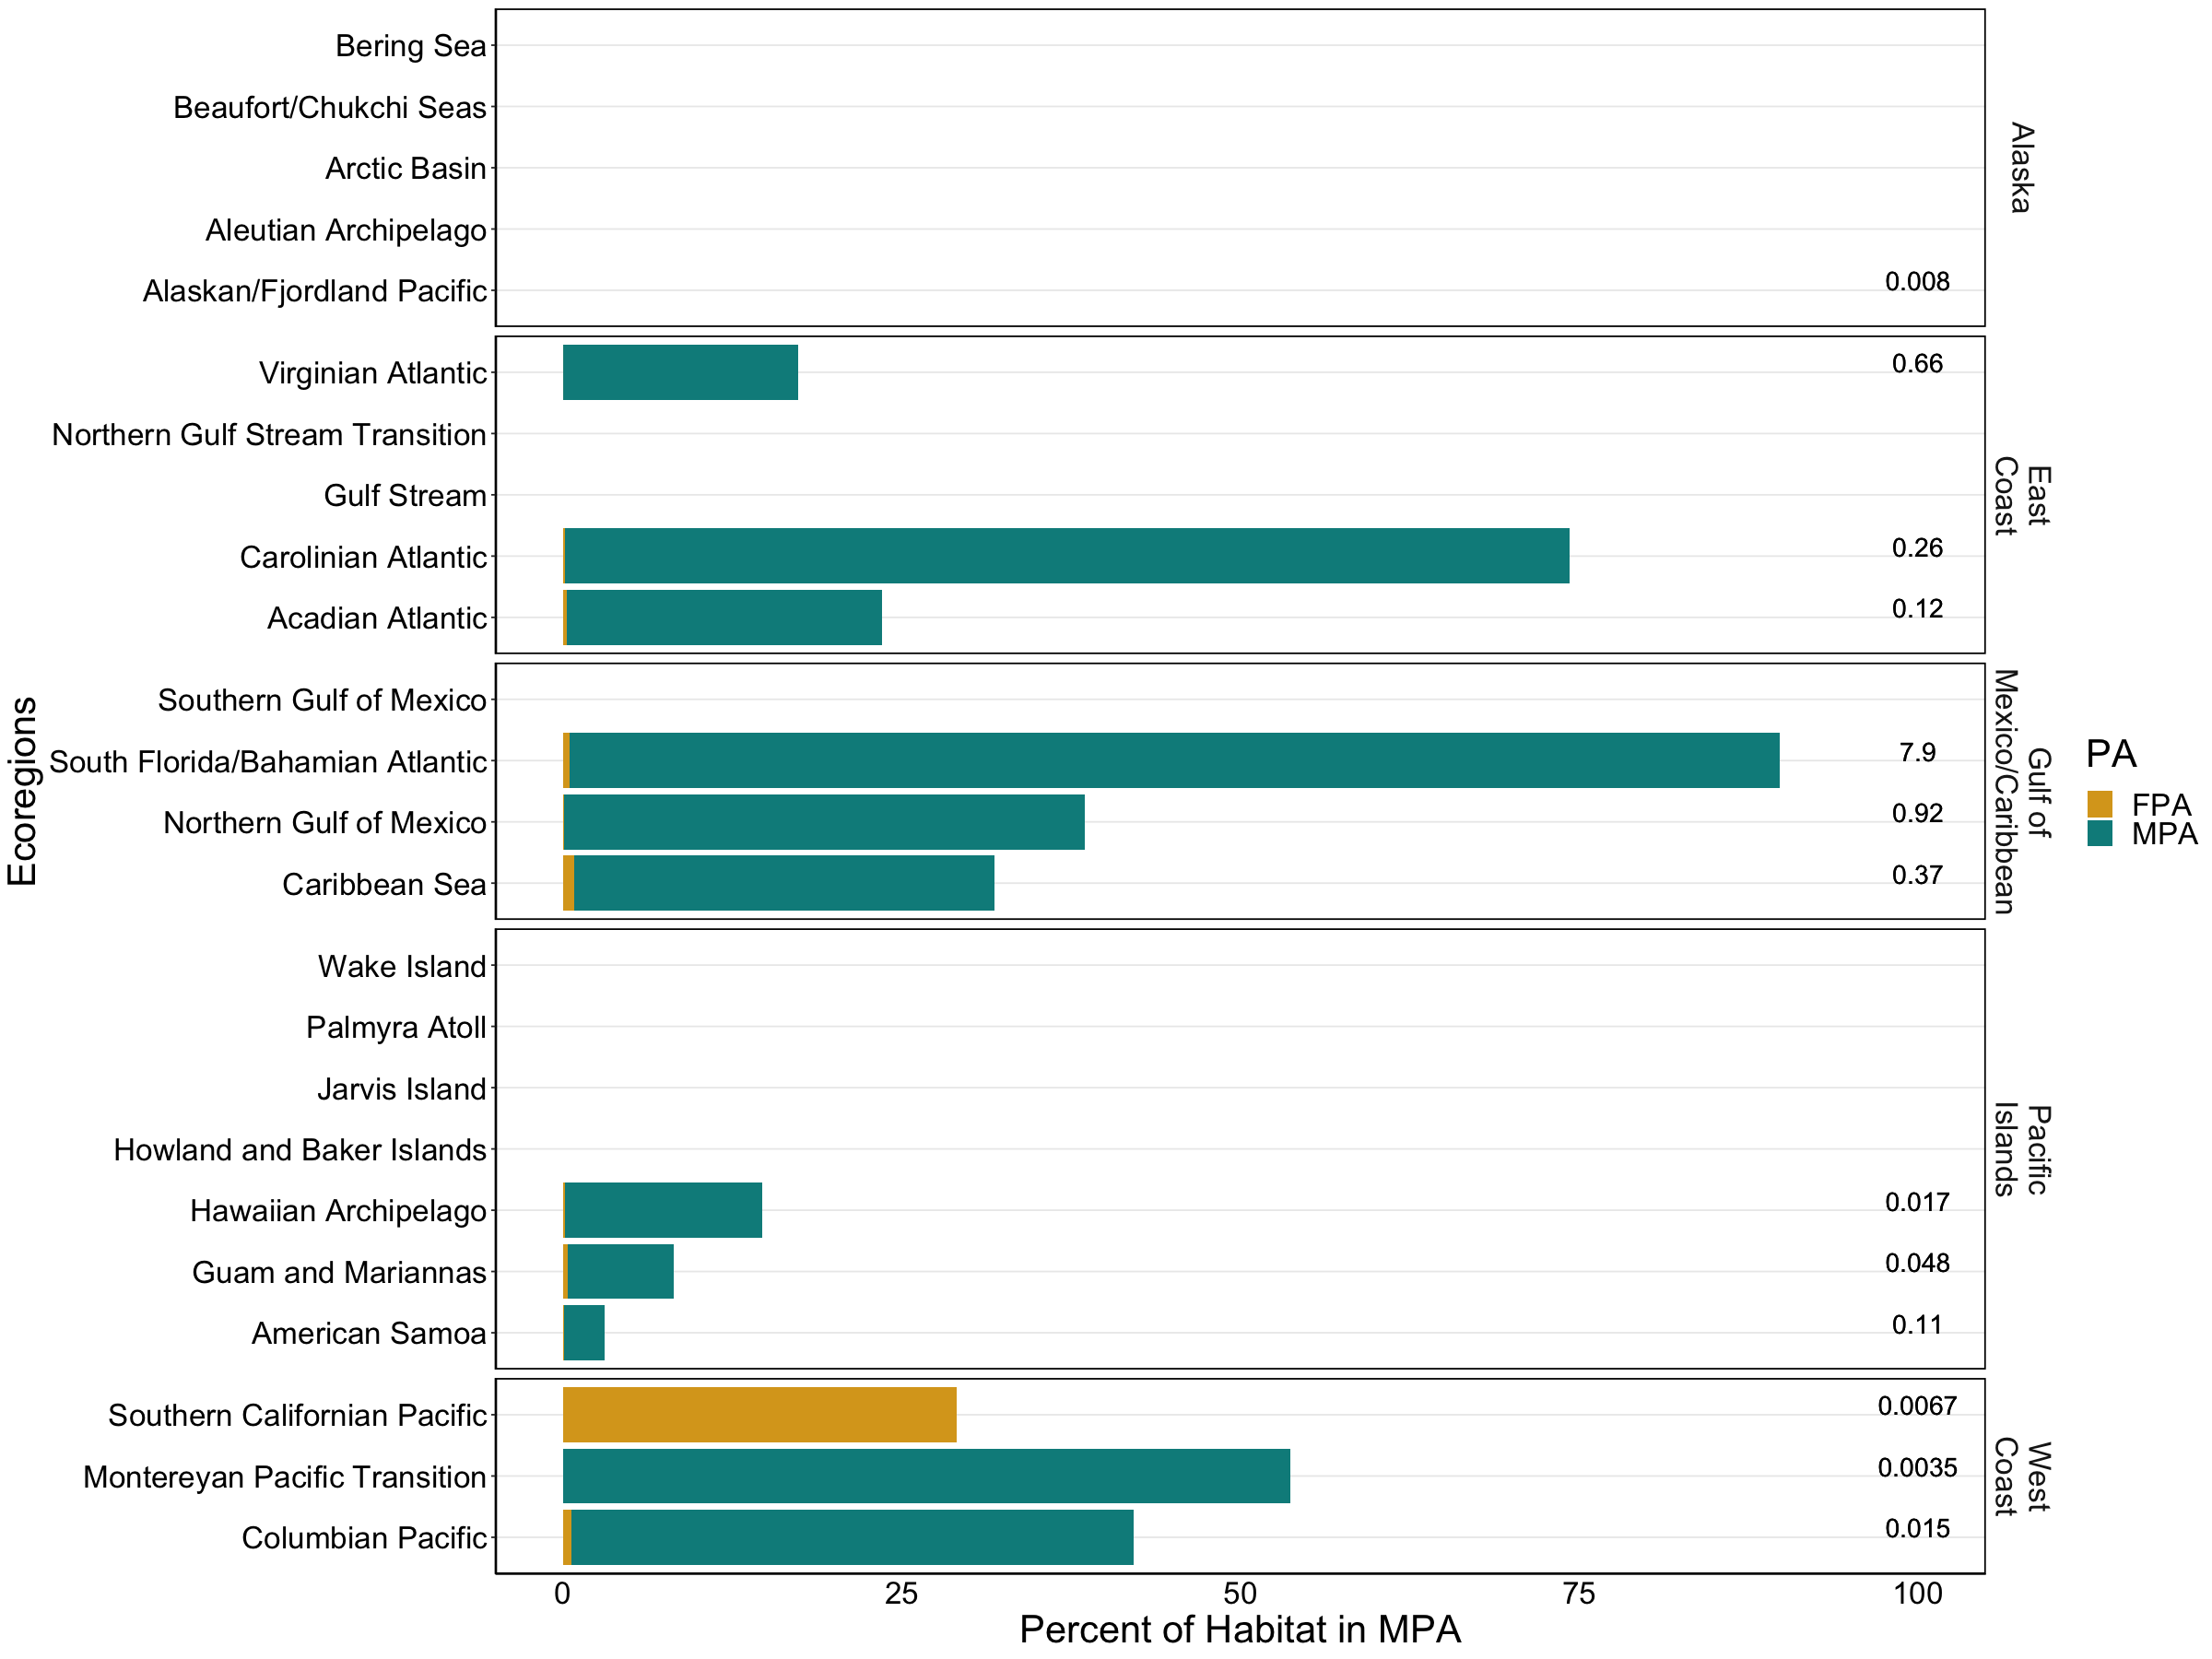

In [11]:
ggplot(mansear[mansear$Habitat=="Seagrass",], aes(y=NAME, x=percent)) +
geom_text(x=100, aes(label=ER.Covered.by.Seagrass),  vjust = 0,  size=6)+
geom_bar(position="identity", stat="identity", aes(fill=PA ))+
scale_fill_manual(values=c("goldenrod", "cyan4"))+
facet_grid(Region~., scales="free", space="free",    labeller = labeller(Region = label_wrap_gen(10)))+
theme_bw()+
labs(x="Percent of Habitat in MPA", shape="", size="Percent of ER")+
theme(legend.position="right",  
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          panel.border=element_rect(colour="black",size=1),
          axis.ticks.x=element_blank(), 
          axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25),
          strip.background = element_blank())+
    xlim(0,100)+
#coord_flip()+
ylab("Ecoregions")

## Tropical coral reef bar plot

In [12]:
coralr=pivot_longer(coralr,
  cols=c('CWC_MPA','CWC_FPA', 'CR_MPA','CR_FPA'),
  names_to = c("Habitat","PA"),
    names_sep = "_",
  values_to = "percent"
         )

In [13]:
head(coralr)

NAME,Ecoregion_ID,PCT.of.ER.Covered.by.CWC.Habitat,PCT.of.ER.Covered.by.CR,Region,Habitat,PA,percent
<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
Acadian Atlantic,1,22.502200,NA,East Coast,CWC,MPA,0.390612962
Acadian Atlantic,1,22.502200,NA,East Coast,CWC,FPA,NA
Acadian Atlantic,1,22.502200,NA,East Coast,CR,MPA,NA
Acadian Atlantic,1,22.502200,NA,East Coast,CR,FPA,NA
Alaskan/Fjordland Pacific,2,3.965548,NA,Alaska,CWC,MPA,0.000517848
Alaskan/Fjordland Pacific,2,3.965548,NA,Alaska,CWC,FPA,0.000517848


Warning message:
“Removed 29 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 29 rows containing missing values (geom_point).”


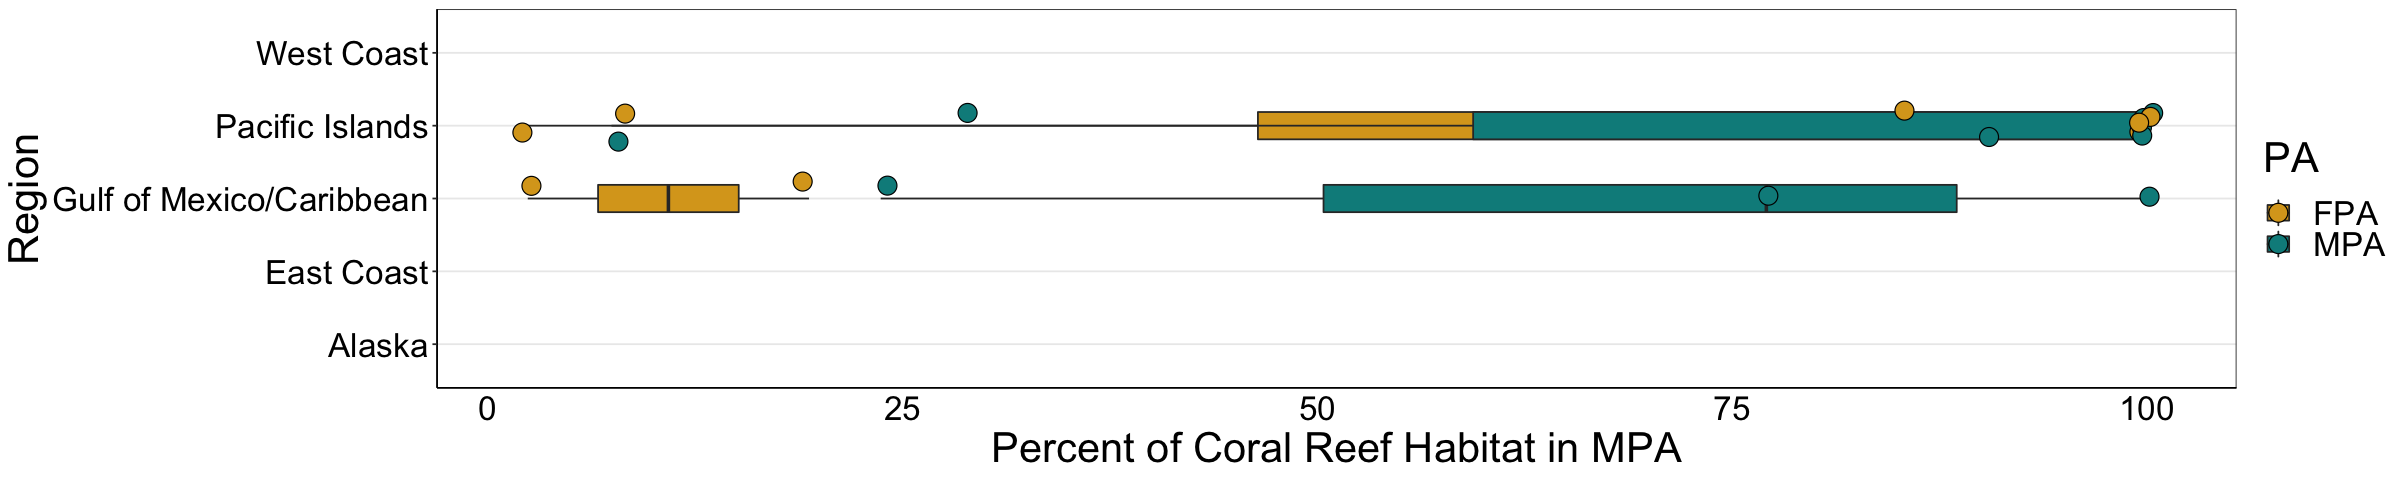

In [21]:
ggplot(coralr[coralr$Habitat=="CR",], aes(y=Region, x=percent, fill=PA)) +
scale_fill_manual(values=c("goldenrod", "cyan4"))+
geom_boxplot(position=position_dodge(0) )+
geom_point(aes(fill=PA),shape=21,position=position_jitterdodge(dodge.width=0, jitter.height = .5, jitter.width = .5), size=5)+
theme_bw()+
labs(x="Percent of Coral Reef Habitat in MPA")+
theme(legend.position="right",  
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),

          axis.ticks.x=element_blank(), 
          axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25)
      )


In [15]:
coralr$PCT.of.ER.Covered.by.CWC.Habitat=signif(coralr$PCT.of.ER.Covered.by.CWC.Habitat, digits=2)
coralr$PCT.of.ER.Covered.by.CR=signif(coralr$PCT.of.ER.Covered.by.CR, digits=2)

Warning message:
“Removed 26 rows containing missing values (geom_text).”
Warning message:
“Removed 29 rows containing missing values (geom_bar).”


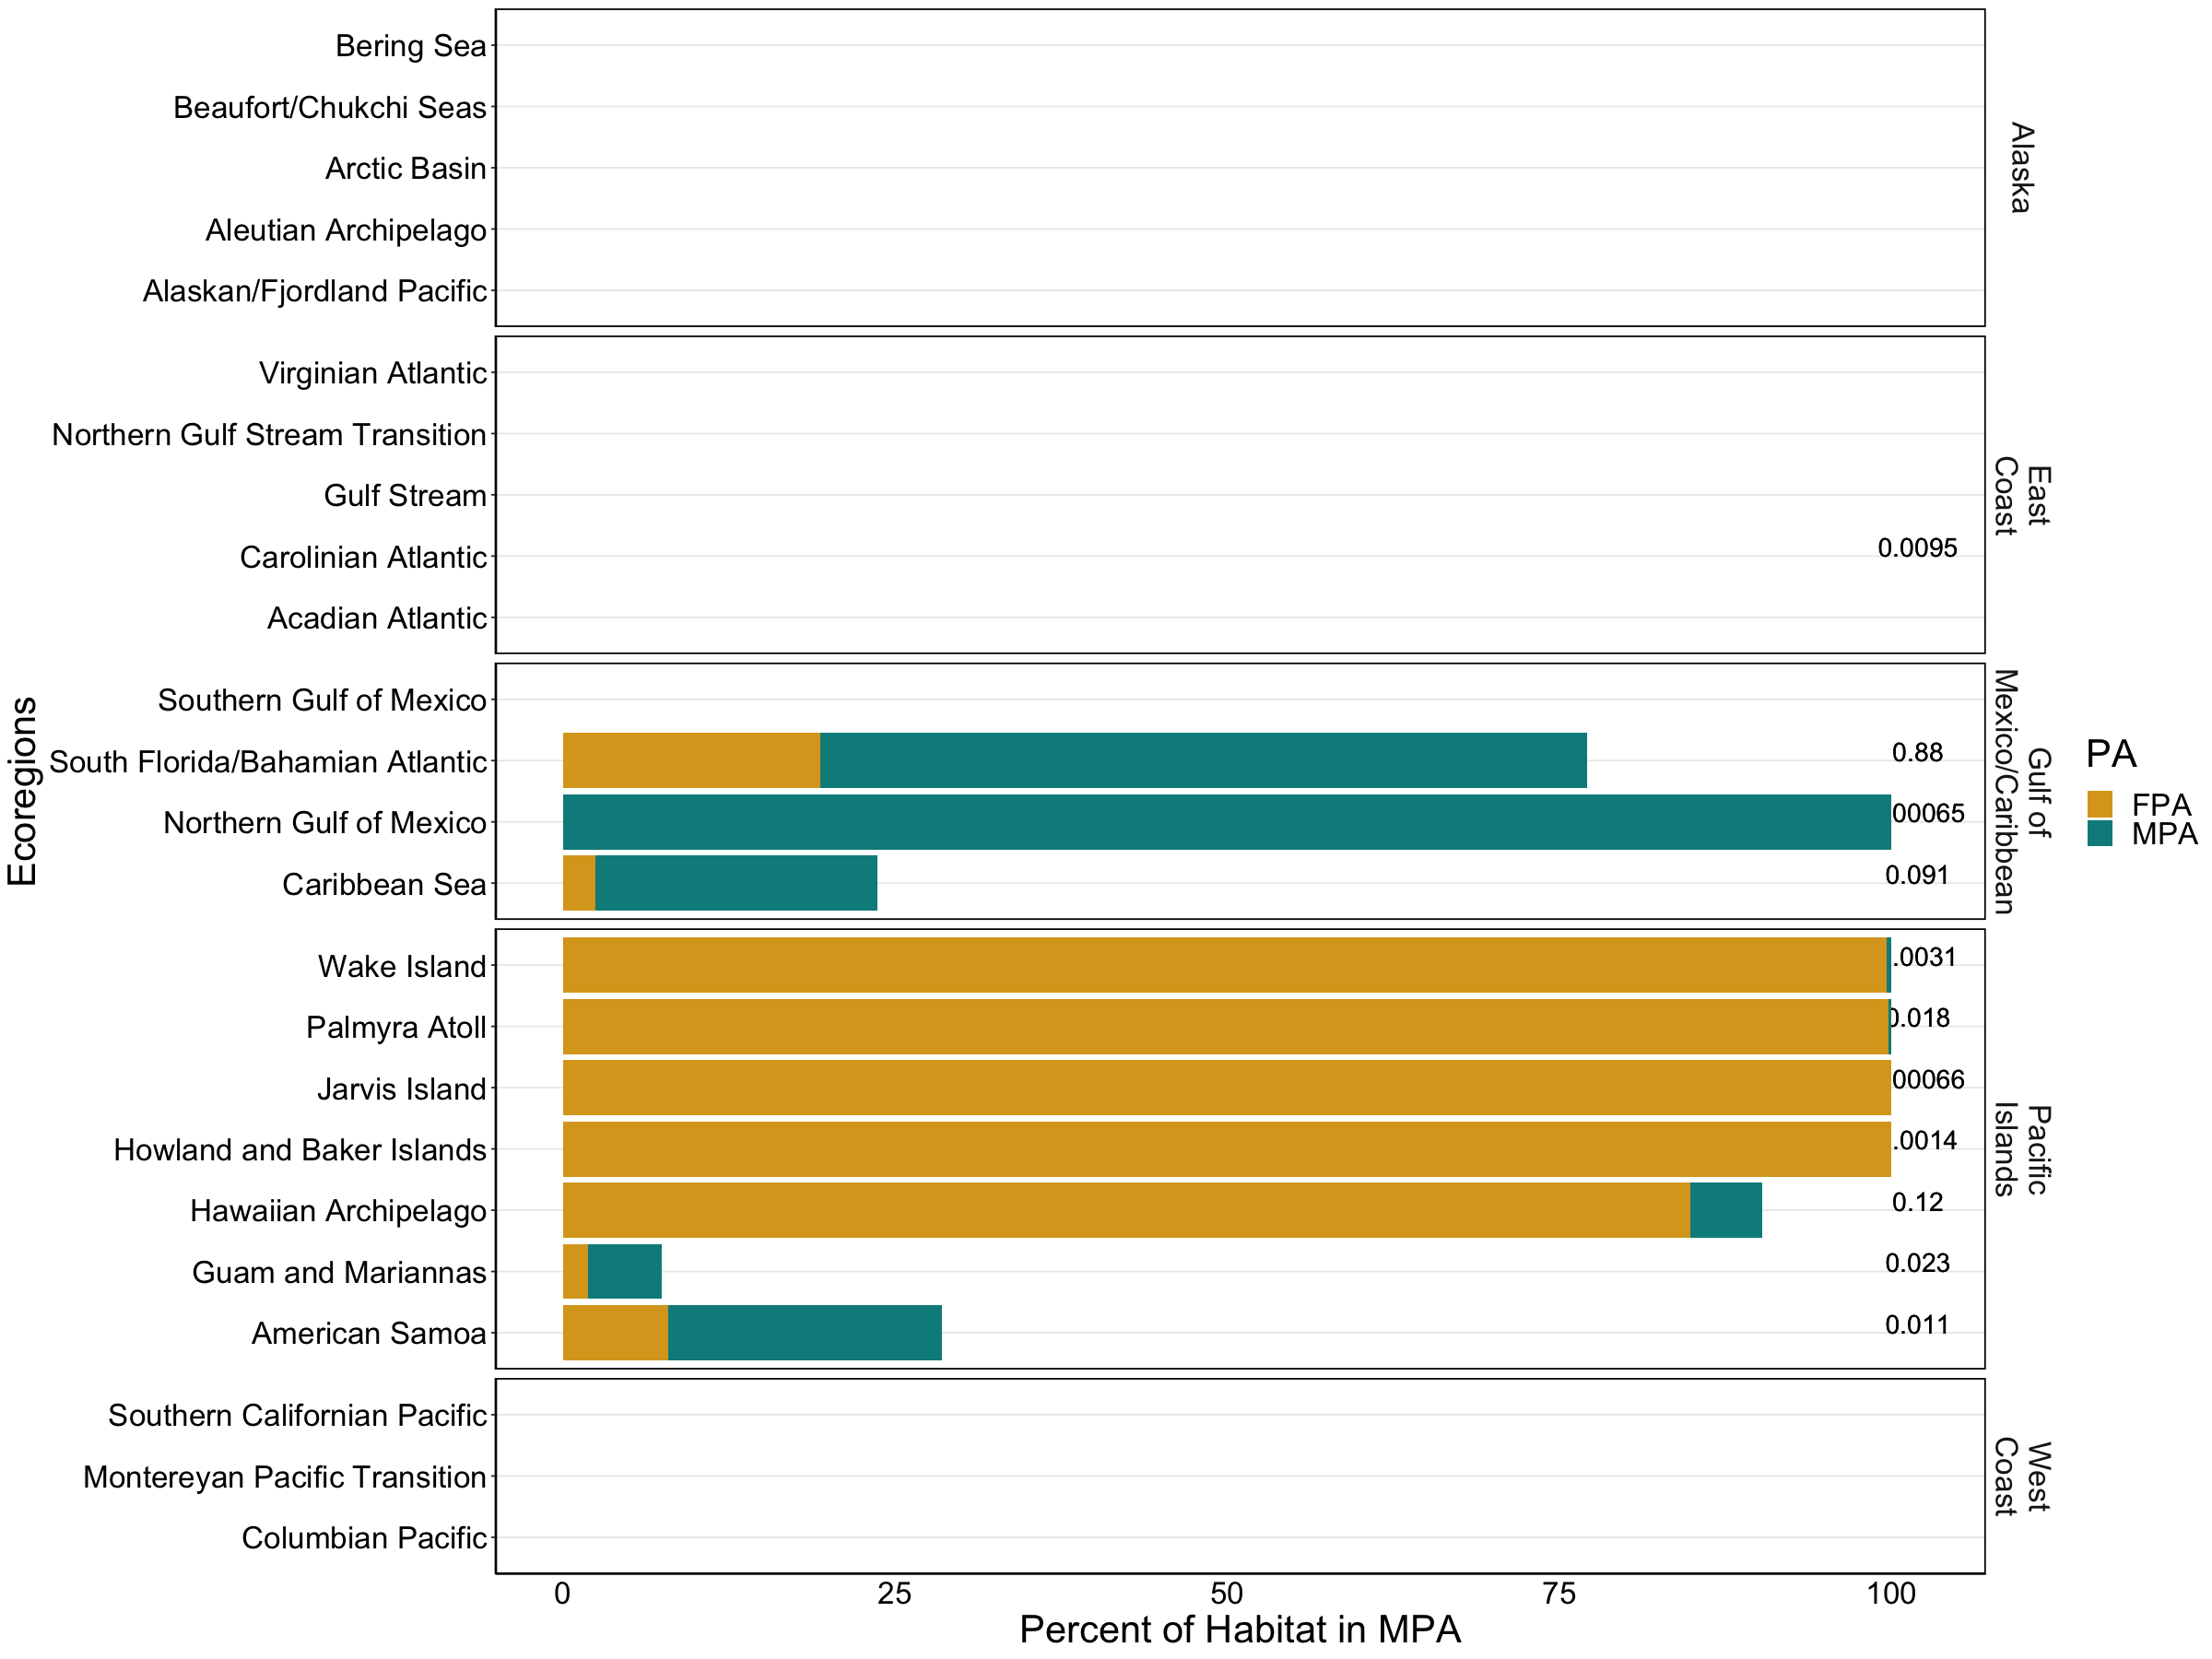

In [16]:
ggplot(coralr[coralr$Habitat=="CR",], aes(y=NAME, x=percent)) +
geom_text(x=102, aes(label=PCT.of.ER.Covered.by.CR),  vjust = 0,  size=6)+
geom_bar(position="identity", stat="identity", aes(fill=PA ))+
scale_fill_manual(values=c("goldenrod", "cyan4"))+
facet_grid(Region~., scales="free", space="free",    labeller = labeller(Region = label_wrap_gen(10)))+
theme_bw()+
labs(x="Percent of Habitat in MPA", shape="", size="Percent of ER")+
theme(legend.position="right",  
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          panel.border=element_rect(colour="black",size=1),
          axis.ticks.x=element_blank(), 
          axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25),
          strip.background = element_blank())+
    xlim(0,102)+
#coord_flip()+
ylab("Ecoregions")

Warning message:
“Removed 2 rows containing missing values (geom_text).”
Warning message:
“Removed 13 rows containing missing values (geom_bar).”


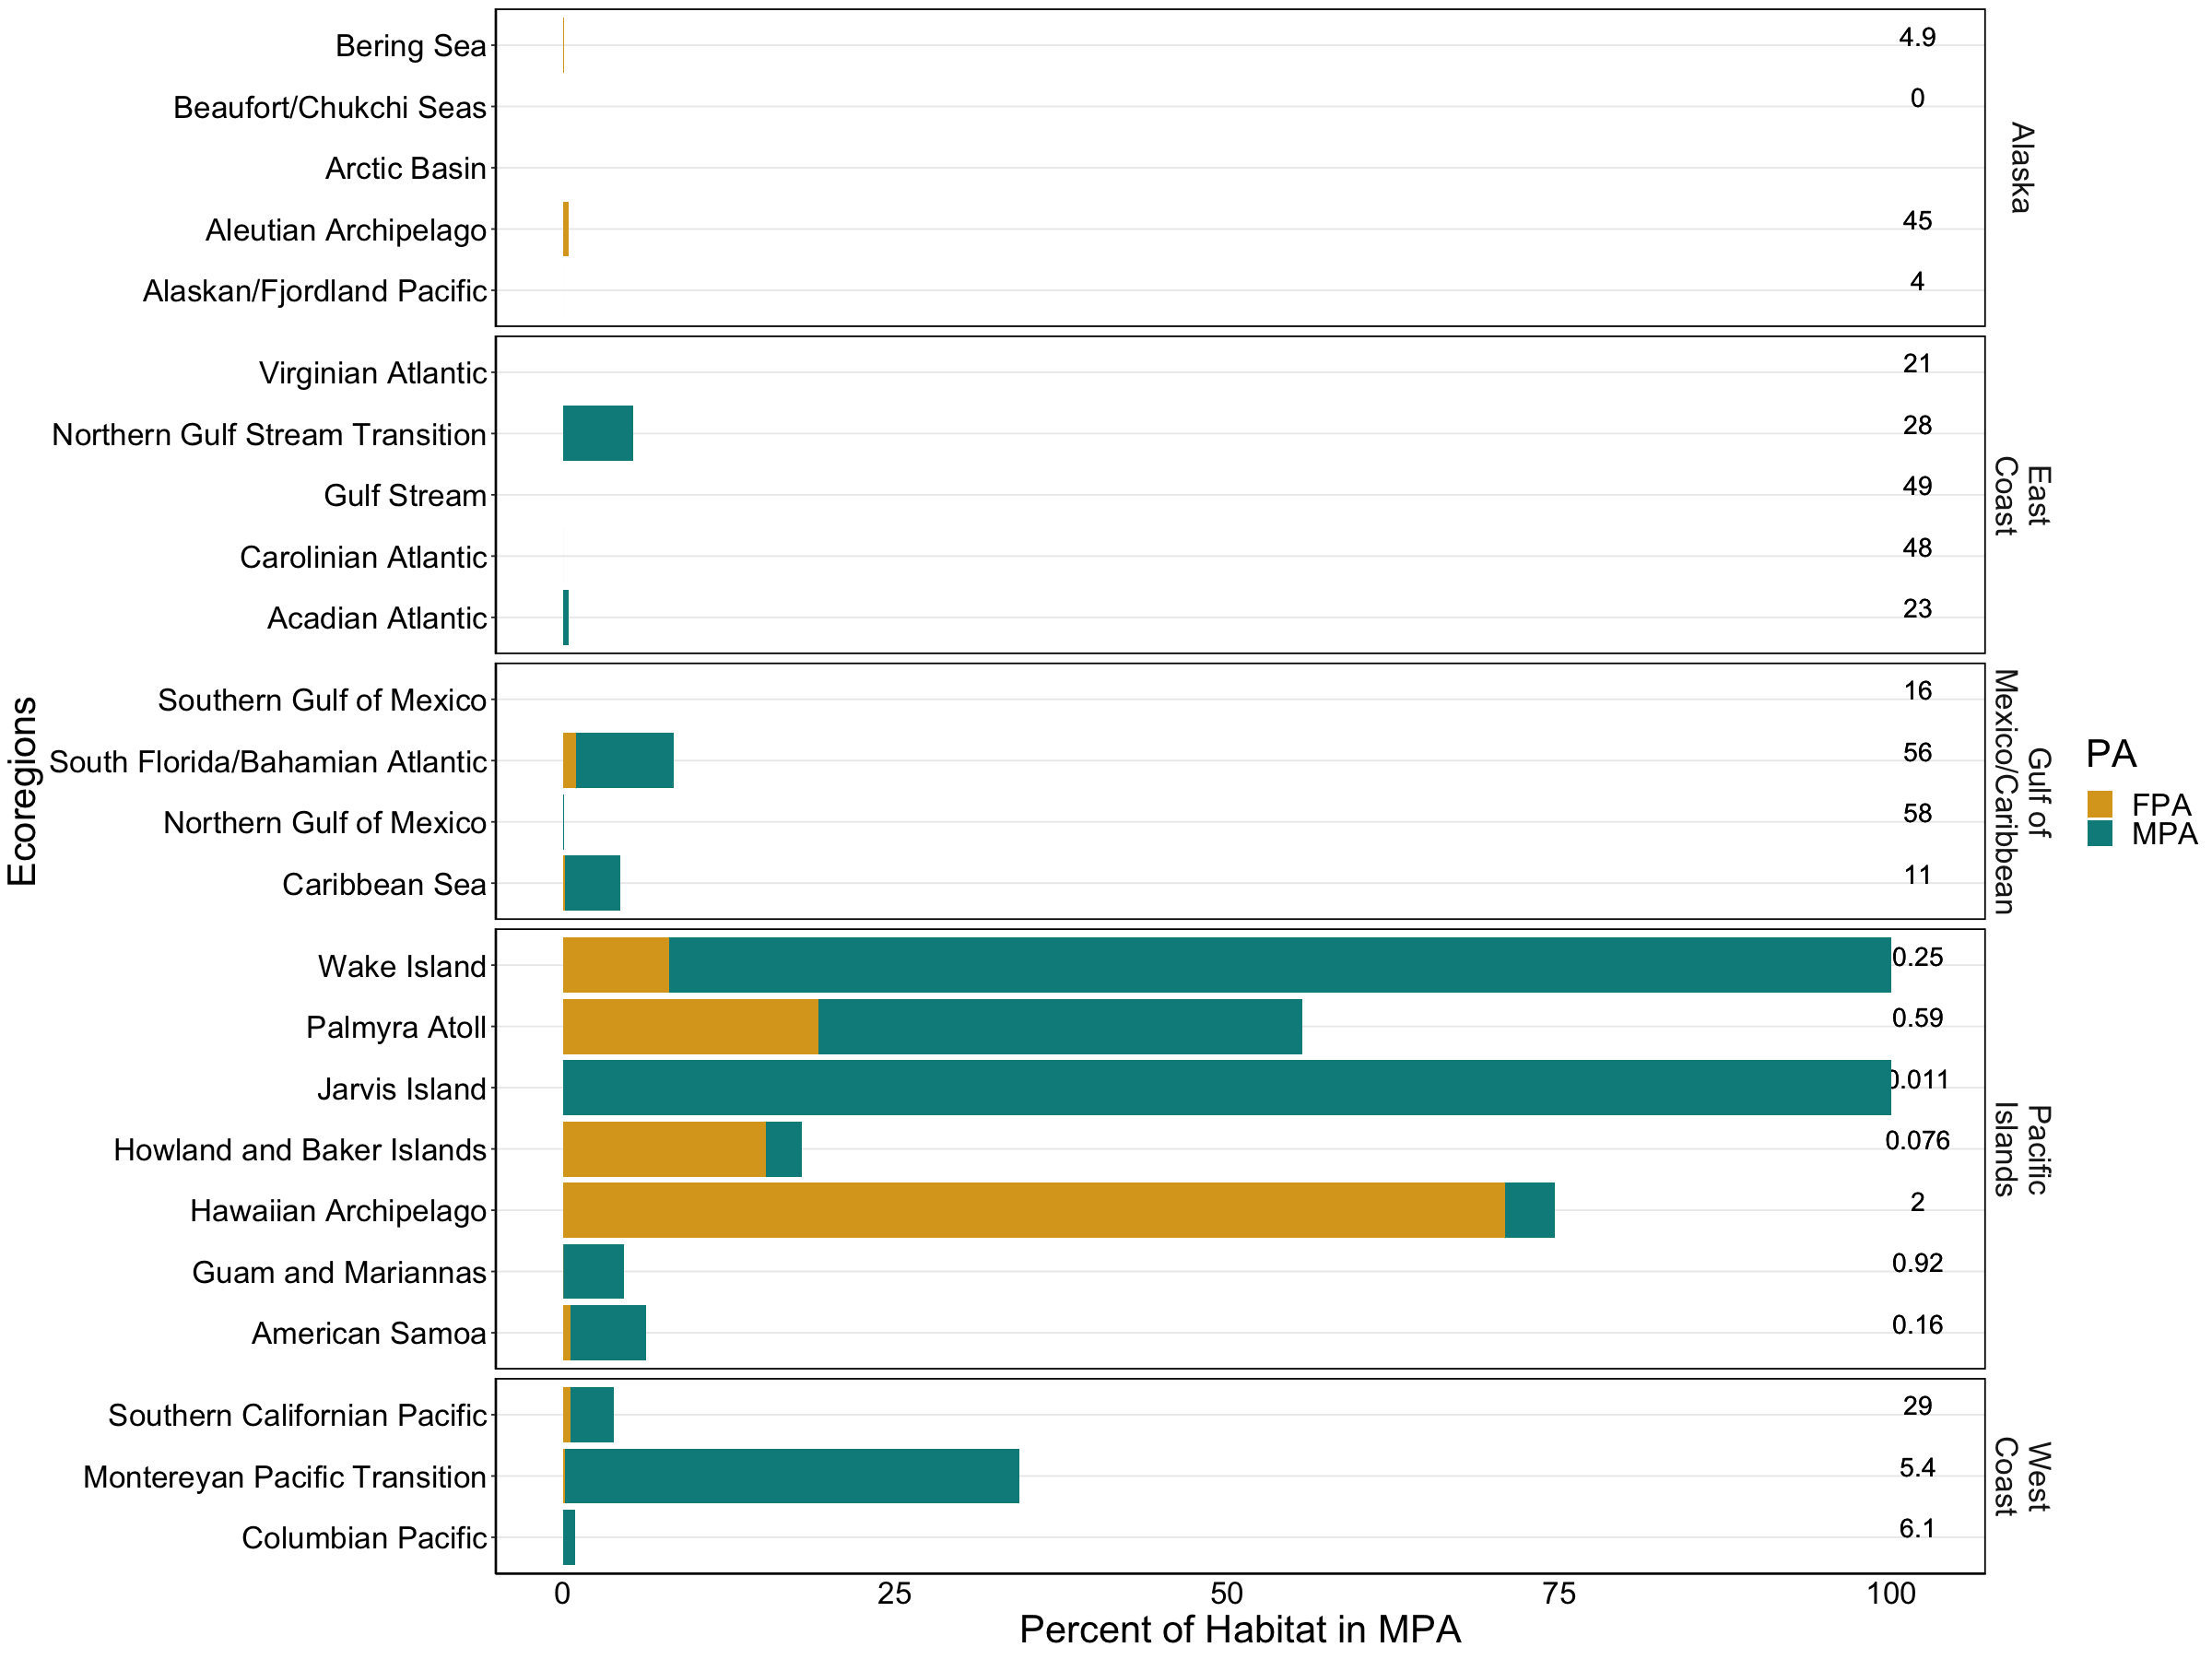

In [18]:
ggplot(coralr[coralr$Habitat=="CWC",], aes(y=NAME, x=percent)) +
geom_text(x=102, aes(label=PCT.of.ER.Covered.by.CWC.Habitat),  vjust = 0,  size=6)+
geom_bar(position="identity", stat="identity", aes(fill=PA ))+
scale_fill_manual(values=c("goldenrod", "cyan4"))+
facet_grid(Region~., scales="free", space="free",    labeller = labeller(Region = label_wrap_gen(10)))+
theme_bw()+
labs(x="Percent of Habitat in MPA", shape="", size="Percent of ER")+
theme(legend.position="right",  
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          panel.border=element_rect(colour="black",size=1),
          axis.ticks.x=element_blank(), 
          axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25),
          strip.background = element_blank())+
    xlim(0,102)+
#coord_flip()+
ylab("Ecoregions")

In [19]:
options(repr.plot.width=20, repr.plot.height=4)

Warning message:
“Removed 37 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 37 rows containing missing values (geom_point).”


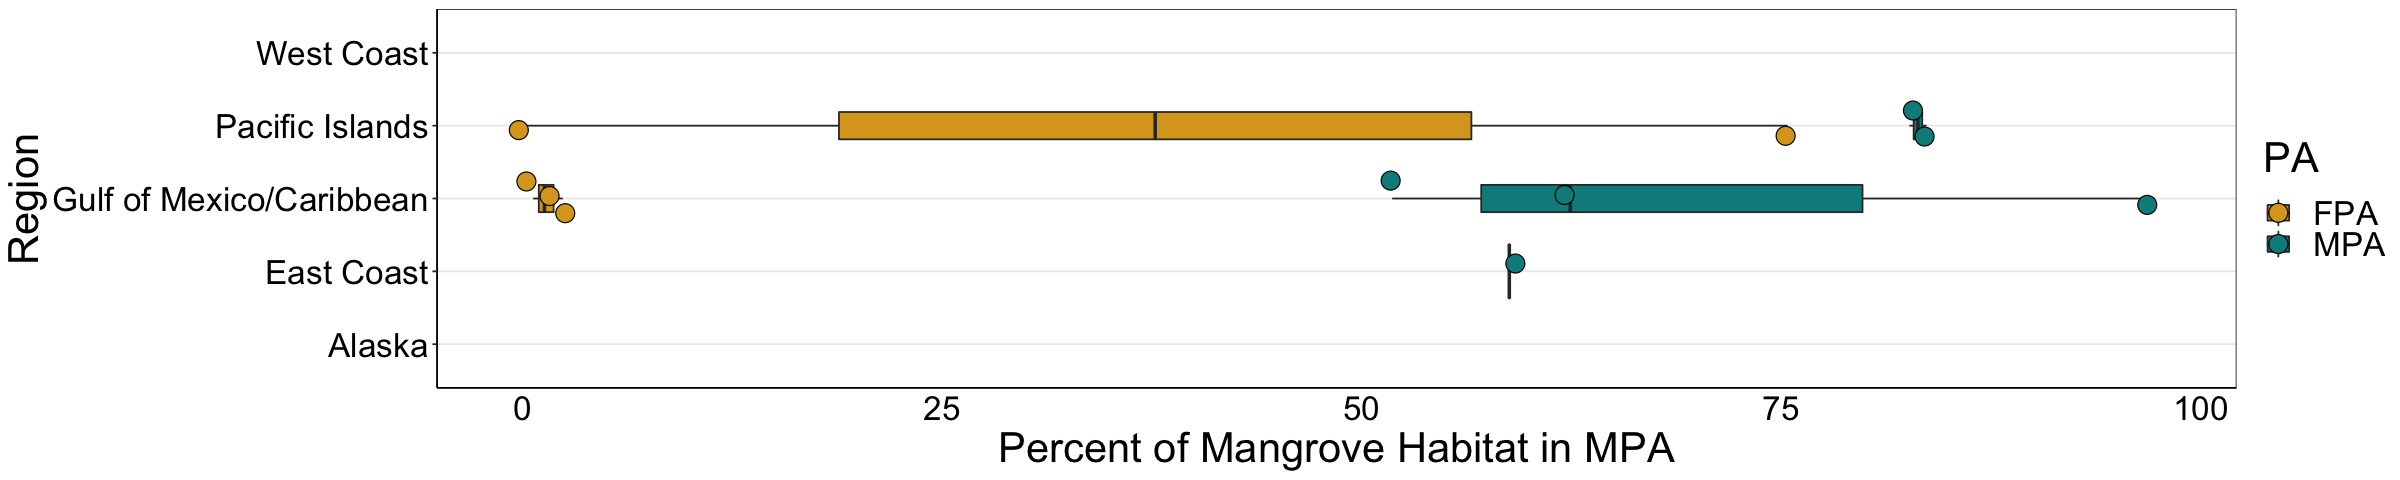

In [20]:
ggplot(mansear[mansear$Habitat=="Mangrove",], aes(y=Region, x=percent, fill=PA)) +
scale_fill_manual(values=c("goldenrod", "cyan4"))+
geom_boxplot(position=position_dodge(0) )+
geom_point(aes(fill=PA),shape=21,position=position_jitterdodge(dodge.width=0, jitter.height = .5, jitter.width = .5), size=5)+
theme_bw()+
labs(x="Percent of Mangrove Habitat in MPA")+
theme(legend.position="right",  
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),

          axis.ticks.x=element_blank(), 
          axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25)
      )


In [160]:
position_jitterdodge(jitter.width = NULL, jitter.height = 0, dodge.height = 0)

function (jitter.width = NULL, jitter.height = 0, dodge.width = 0.75, 
    seed = NA) 
{
    if (!is.null(seed) && is.na(seed)) {
        seed <- sample.int(.Machine$integer.max, 1L)
    }
    ggproto(NULL, PositionJitterdodge, jitter.width = jitter.width, 
        jitter.height = jitter.height, dodge.width = dodge.width, 
        seed = seed)
}
<bytecode: 0x7fb9dfff1b58>
<environment: namespace:ggplot2>

Warning message:
“Removed 25 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 25 rows containing missing values (geom_point).”


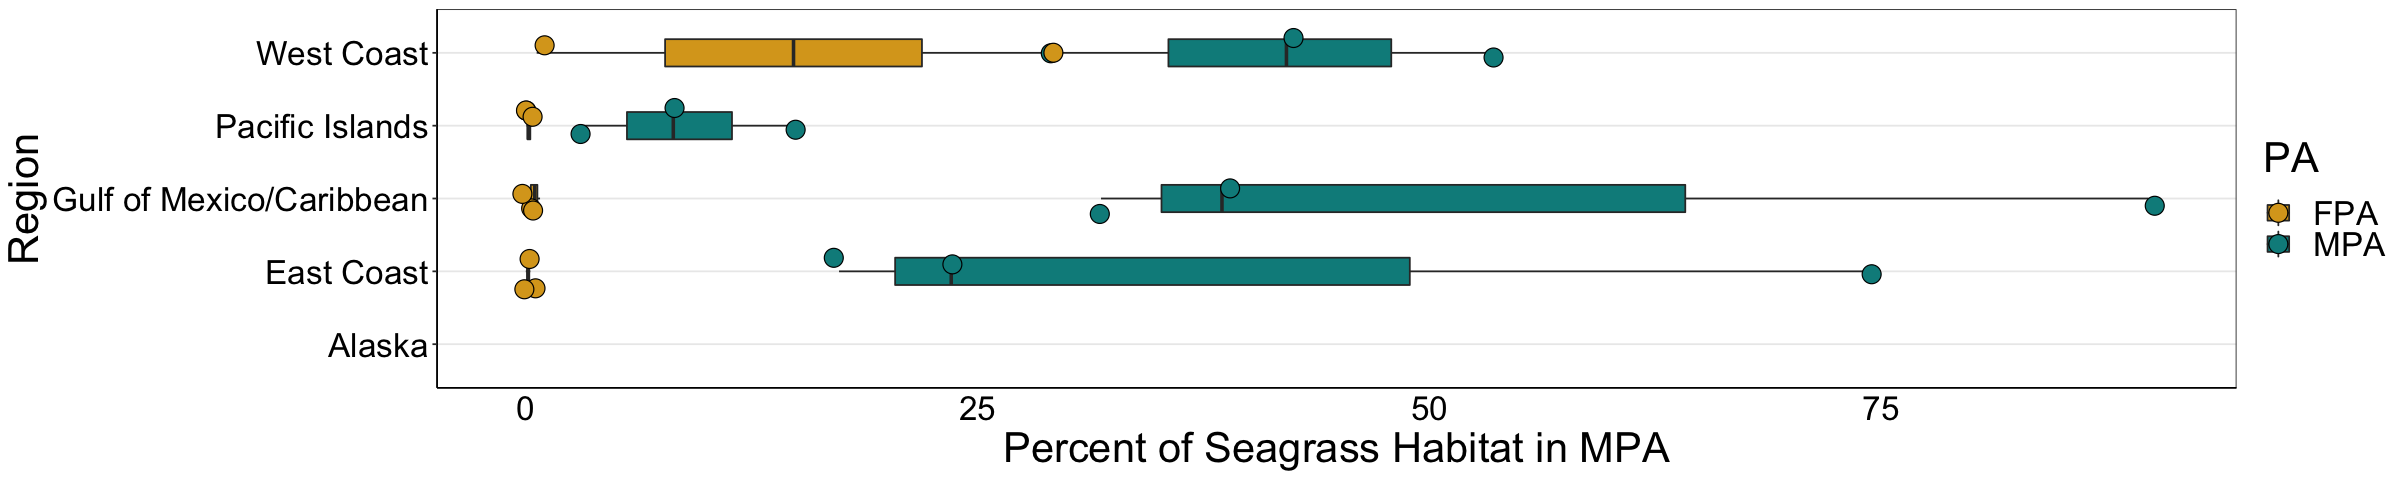

In [186]:
ggplot(mansear[mansear$Habitat=="Seagrass",], aes(y=Region, x=percent, fill=PA)) +
scale_fill_manual(values=c("goldenrod", "cyan4"))+
geom_boxplot(position=position_dodge(0) )+
geom_point(aes(fill=PA),shape=21,position=position_jitterdodge(dodge.width=0, jitter.height = .5, jitter.width = .5), size=5)+
theme_bw()+
labs(x="Percent of Seagrass Habitat in MPA")+
theme(legend.position="right",  
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),

          axis.ticks.x=element_blank(), 
          axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25)
      )